# Bibliotecas

In [122]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [73]:
df = pd.read_csv('../datasets/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Converter String para Data

In [74]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


# Série Temporal

<AxesSubplot:xlabel='Month', ylabel='#Passengers'>

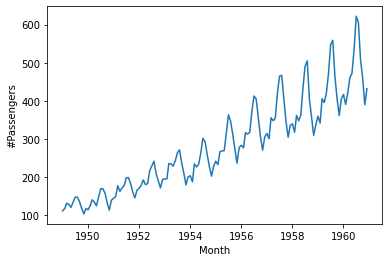

In [75]:
sns.lineplot(x = 'Month', y = '#Passengers', data =df)

## Transformar a Data em Index

In [104]:
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
df

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: #Passengers, Length: 144, dtype: int64

## Componentes

In [105]:
componentes = seasonal_decompose(df)
componentes

## Componente Sazonal

<AxesSubplot:ylabel='seasonal'>

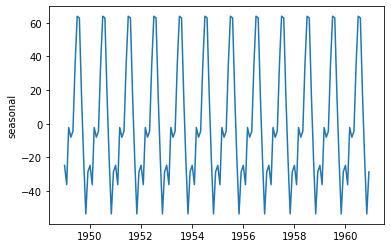

In [106]:
sns.lineplot(data = componentes.seasonal)

## Componente Tendência

<AxesSubplot:ylabel='trend'>

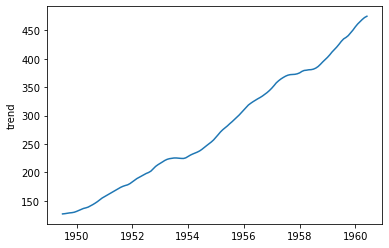

In [107]:
sns.lineplot(data = componentes.trend)

## Componente Residual

<AxesSubplot:ylabel='resid'>

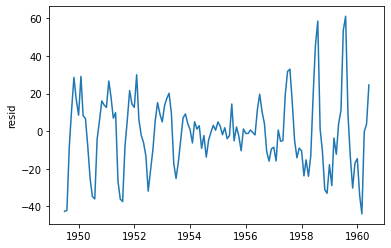

In [108]:
sns.lineplot(data = componentes.resid)

## Componente Observado

<AxesSubplot:ylabel='#Passengers'>

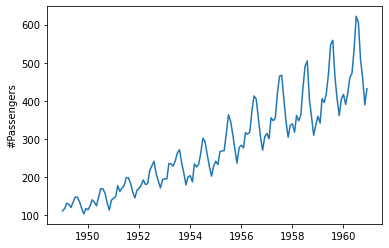

In [109]:
sns.lineplot(data = componentes.observed)

# Previsão com ARIMA

In [118]:
modelo = ARIMA(df, order=(1, 1, 2))
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -688.749
Date:                Wed, 02 Jun 2021   AIC                           1385.498
Time:                        21:54:12   BIC                           1397.349
Sample:                    01-01-1949   HQIC                          1390.313
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5724      0.097      5.928      0.000       0.383       0.762
ma.L1         -0.3126      0.098     -3.198      0.001      -0.504      -0.121
ma.L2         -0.5078      0.069     -7.412      0.000      -0.642      -0.373
sigma2       889.2132    103.456      8.595      0.000     686.443    1091.983
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.81   Prob(JB):                         0.93
Heteroskedasticity (H):               7.62   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Fazendo previsão para os próximos 12 meses

In [112]:
previsoes = modelo_treinado.forecast(steps = 12)
previsoes

1961-01-01    475.254157
1961-02-01    471.699153
1961-03-01    469.664172
1961-04-01    468.499294
1961-05-01    467.832486
1961-06-01    467.450787
1961-07-01    467.232292
1961-08-01    467.107220
1961-09-01    467.035625
1961-10-01    466.994642
1961-11-01    466.971182
1961-12-01    466.957753
Freq: MS, Name: predicted_mean, dtype: float64

## Auto ARIMA

In [123]:
modelo_auto = auto_arima(df, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Wed, 02 Jun 2021   AIC                           1017.847
Time:                                     22:00:48   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.344      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3080     14.555      8.884      0.000     100.780     157.836
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
previsoes = modelo_auto.predict(n_periods = 12)
previsoes

array([445.63492135, 420.3949863 , 449.19830748, 491.83993396,
       503.39446547, 566.86244169, 654.26017031, 638.5974858 ,
       540.88374373, 494.12662715, 423.3327197 , 465.5075914 ])